<a href="https://colab.research.google.com/github/LOHITH2403/Samsung/blob/main/lohith_Samsung_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Name: Lohith Kumar K B


#  USN : 1AJ22CS077


# College: Cambridge Institute of Technology North-Campus


 # E-mail: Lohithkumarkb24@gmail.com


 # Project : Vehicle Resale value Estimation

#Vehicle resale value project



In [143]:
import numpy as np

In [144]:
datalink = '/content/vehicle_resale_value.csv'

Analyzing the Data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv(datalink)

In [147]:
df.head()

,vehicle_age_years,mileage_km,brand_tier,accident_count,service_history,ownership_count,vehicle_color,feature_package,market_demand,fuel_type,transmission,body_type,resale_value_usd
0,13.0,238276.066298,Budget,1.0,Complete,3.0,Other,Base,Medium,Petrol,Manual,Truck,77840.075894
1,4.0,112096.618741,Mainstream,1.0,Complete,4.0,Other,Premium,NaN,Diesel,Manual,Sedan,69543.393802
2,18.0,140140.179916,Luxury,0.0,NaN,1.0,White,Luxury,High,Electric,Manual,Convertible,NaN
3,16.0,188415.153719,Premium,2.0,Complete,2.0,Black,Mid,Low,Electric,Manual,Truck,35455.213825
4,10.0,182645.775262,Luxury,0.0,NaN,3.0,Other,Mid,Low,Petrol,Manual,Truck,35287.693922


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age_years  964 non-null    float64
 1   mileage_km         946 non-null    float64
 2   brand_tier         951 non-null    object 
 3   accident_count     951 non-null    float64
 4   service_history    770 non-null    object 
 5   ownership_count    957 non-null    float64
 6   vehicle_color      946 non-null    object 
 7   feature_package    938 non-null    object 
 8   market_demand      947 non-null    object 
 9   fuel_type          950 non-null    object 
 10  transmission       960 non-null    object 
 11  body_type          947 non-null    object 
 12  resale_value_usd   959 non-null    float64
dtypes: float64(5), object(8)
memory usage: 101.7+ KB


In [149]:
df.describe()

,vehicle_age_years,mileage_km,accident_count,ownership_count,resale_value_usd
count,964.000000,946.000000,951.000000,957.000000,959.000000
mean,10.119295,133156.810192,0.692955,2.526646,41310.175055
std,5.421897,70636.570112,0.834987,1.119703,22110.353851
min,1.000000,6062.101609,0.000000,1.000000,3260.991097
25%,6.000000,71247.565500,0.000000,2.000000,22075.252029
50%,10.000000,136858.320476,1.000000,3.000000,42206.278959
75%,15.000000,194393.113975,1.000000,4.000000,59979.734843
max,19.000000,249820.570599,4.000000,4.000000,79992.275691


Finding Missing values and Data Imputation

In [150]:
df.isnull()

,vehicle_age_years,mileage_km,brand_tier,accident_count,service_history,ownership_count,vehicle_color,feature_package,market_demand,fuel_type,transmission,body_type,resale_value_usd
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [151]:
df.isnull().sum()

,0
vehicle_age_years,36
mileage_km,54
brand_tier,49
accident_count,49
service_history,230
ownership_count,43
vehicle_color,54
feature_package,62
market_demand,53
fuel_type,50


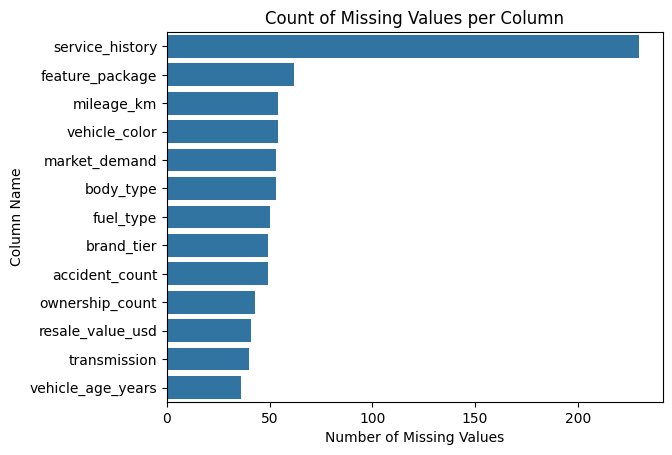

In [152]:
null_counts = df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=null_counts.values, y=null_counts.index)
plt.title('Count of Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column Name')
plt.show()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age_years  964 non-null    float64
 1   mileage_km         946 non-null    float64
 2   brand_tier         951 non-null    object 
 3   accident_count     951 non-null    float64
 4   service_history    770 non-null    object 
 5   ownership_count    957 non-null    float64
 6   vehicle_color      946 non-null    object 
 7   feature_package    938 non-null    object 
 8   market_demand      947 non-null    object 
 9   fuel_type          950 non-null    object 
 10  transmission       960 non-null    object 
 11  body_type          947 non-null    object 
 12  resale_value_usd   959 non-null    float64
dtypes: float64(5), object(8)
memory usage: 101.7+ KB


Data imputation

In [154]:
df['vehicle_age_years'] = df['vehicle_age_years'].fillna(df['vehicle_age_years'].mean())
print(df['vehicle_age_years'].isna().sum())

0


In [155]:
df['mileage_km'] = df['mileage_km'].fillna(df['mileage_km'].mean())
print(df['mileage_km'].isna().sum())

0


In [156]:
df['brand_tier'] = df['brand_tier'].fillna(df['brand_tier'].mode()[0])
print(df['brand_tier'].isna().sum())

0


In [157]:
df['accident_count'] = df['accident_count'].fillna(df['accident_count'].mean())
print(df['accident_count'].isna().sum())

0


In [158]:
df['service_history'] = df['service_history'].fillna(df['service_history'].mode()[0])
print(df['service_history'].isna().sum())

0


In [159]:
df['ownership_count'] = df['ownership_count'].fillna(df['ownership_count'].mean())
print(df['ownership_count'].isna().sum())

0


In [160]:
df['vehicle_color'] = df['vehicle_color'].fillna(df['vehicle_color'].mode()[0])
print(df['vehicle_color'].isna().sum())

0


In [161]:
df['feature_package'] = df['feature_package'].fillna(df['feature_package'].mode()[0])
print(df['feature_package'].isna().sum())

0


In [162]:
df['market_demand'] = df['market_demand'].fillna(df['market_demand'].mode()[0])
print(df['market_demand'].isna().sum())

0


In [163]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
print(df['fuel_type'].isna().sum())

0


In [164]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
print(df['transmission'].isna().sum())

0


In [165]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])
print(df['body_type'].isna().sum())

0


In [166]:
df['resale_value_usd'] = df['resale_value_usd'].fillna(df['resale_value_usd'].mean())
print(df['resale_value_usd'].isna().sum())

0


In [167]:
df.isnull().sum()

,0
vehicle_age_years,0
mileage_km,0
brand_tier,0
accident_count,0
service_history,0
ownership_count,0
vehicle_color,0
feature_package,0
market_demand,0
fuel_type,0


In [168]:
df.head()

,vehicle_age_years,mileage_km,brand_tier,accident_count,service_history,ownership_count,vehicle_color,feature_package,market_demand,fuel_type,transmission,body_type,resale_value_usd
0,13.0,238276.066298,Budget,1.0,Complete,3.0,Other,Base,Medium,Petrol,Manual,Truck,77840.075894
1,4.0,112096.618741,Mainstream,1.0,Complete,4.0,Other,Premium,Medium,Diesel,Manual,Sedan,69543.393802
2,18.0,140140.179916,Luxury,0.0,Complete,1.0,White,Luxury,High,Electric,Manual,Convertible,41310.175055
3,16.0,188415.153719,Premium,2.0,Complete,2.0,Black,Mid,Low,Electric,Manual,Truck,35455.213825
4,10.0,182645.775262,Luxury,0.0,Complete,3.0,Other,Mid,Low,Petrol,Manual,Truck,35287.693922


In [169]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1RQlka5rrKDHJlgbkLFCVy0HIi9yBu_zpDPq3MpmP3Ys/edit#gid=0


#EDA AND DATA VISULIZATION

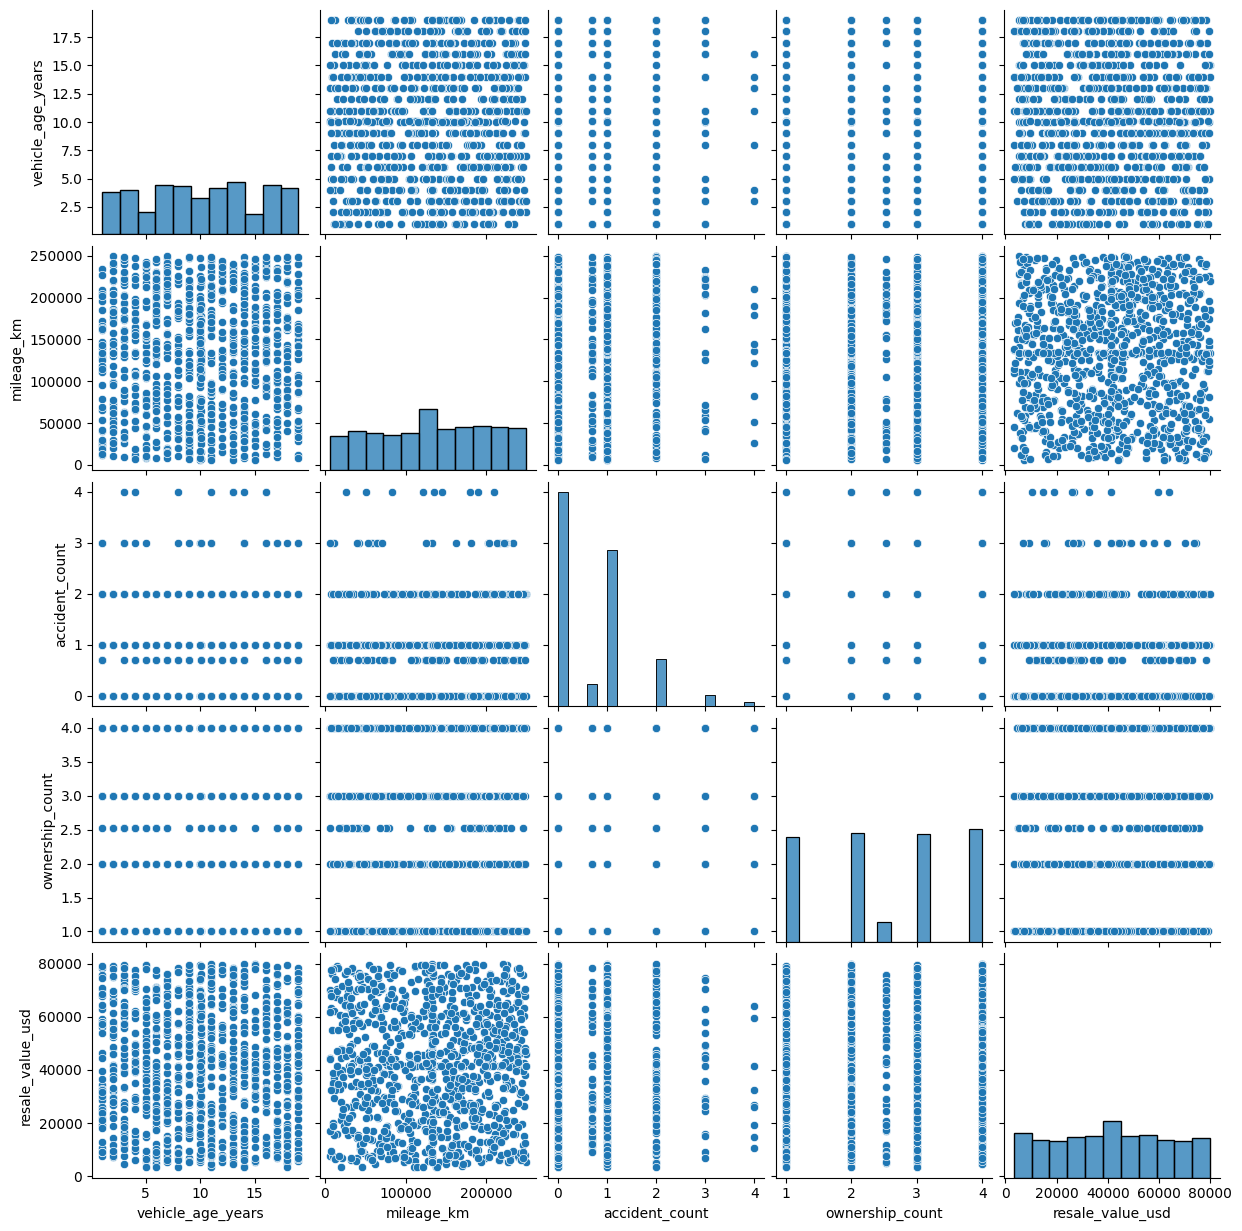

In [170]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

sns.pairplot(df[numerical_cols])
plt.show()

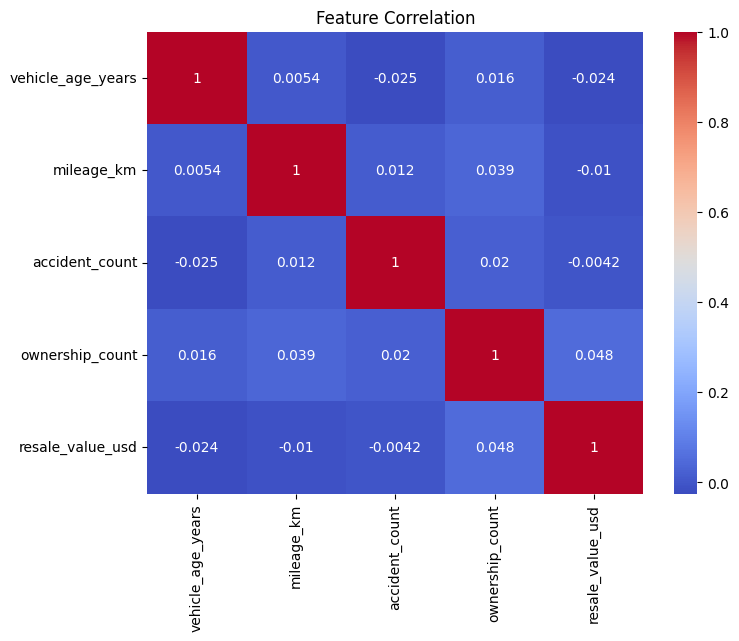

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

1. Box plot for brand_tier

<Figure size 640x480 with 0 Axes>

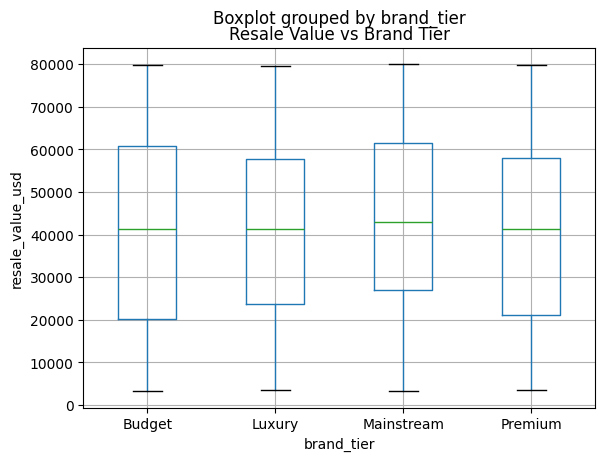

In [172]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column="resale_value_usd", by="brand_tier")
plt.title("Resale Value vs Brand Tier")

plt.xlabel("brand_tier")
plt.ylabel("resale_value_usd")
plt.show()



2. Box plot for service_history

<Figure size 640x480 with 0 Axes>

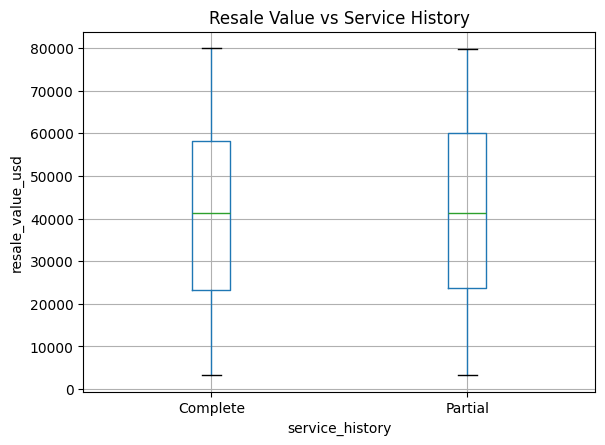

In [173]:
plt.figure()
df.boxplot(column="resale_value_usd", by="service_history")
plt.title("Resale Value vs Service History")
plt.suptitle("")
plt.xlabel("service_history")
plt.ylabel("resale_value_usd")
plt.show()



3. Box plot for vehicle_color

<Figure size 640x480 with 0 Axes>

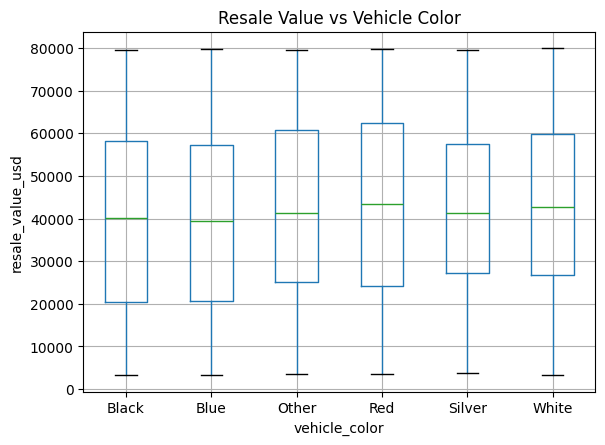

In [174]:
plt.figure()
df.boxplot(column="resale_value_usd", by="vehicle_color")
plt.title("Resale Value vs Vehicle Color")
plt.suptitle("")
plt.xlabel("vehicle_color")
plt.ylabel("resale_value_usd")
plt.show()


4. Box plot for feature_package

<Figure size 640x480 with 0 Axes>

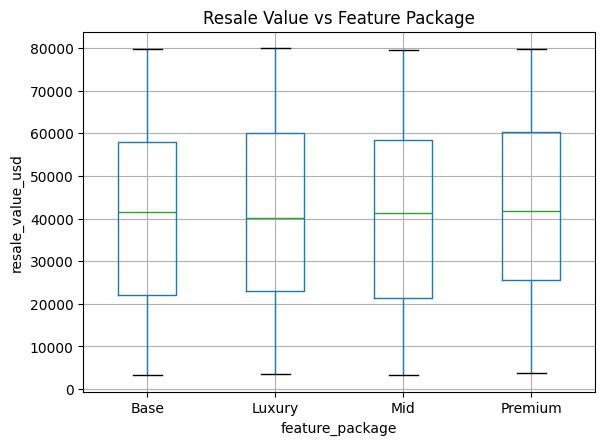

In [175]:
plt.figure()
df.boxplot(column="resale_value_usd", by="feature_package")
plt.title("Resale Value vs Feature Package")
plt.suptitle("")
plt.xlabel("feature_package")
plt.ylabel("resale_value_usd")
plt.show()


5. Box plot for market_demand

<Figure size 640x480 with 0 Axes>

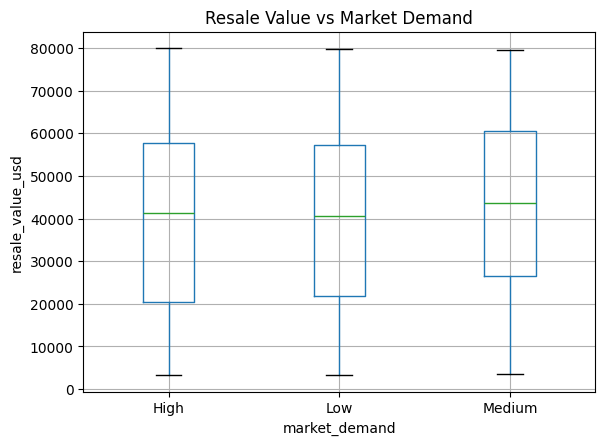

In [176]:
plt.figure()
df.boxplot(column="resale_value_usd", by="market_demand")
plt.title("Resale Value vs Market Demand")
plt.suptitle("")
plt.xlabel("market_demand")
plt.ylabel("resale_value_usd")
plt.show()



6. Box plot for fuel_type

<Figure size 640x480 with 0 Axes>

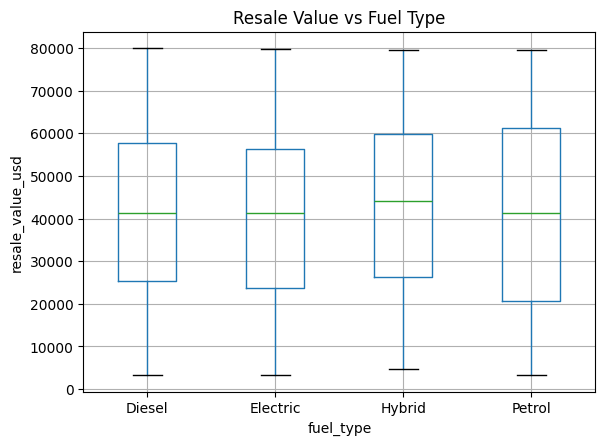

In [177]:
plt.figure()
df.boxplot(column="resale_value_usd", by="fuel_type")
plt.title("Resale Value vs Fuel Type")
plt.suptitle("")
plt.xlabel("fuel_type")
plt.ylabel("resale_value_usd")
plt.show()



7. Box plot for transmission

<Figure size 640x480 with 0 Axes>

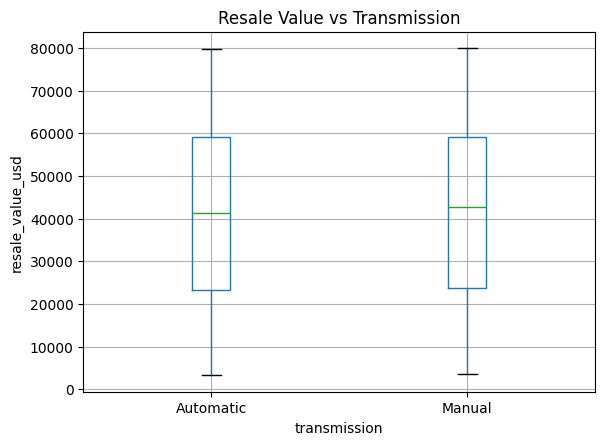

In [178]:
plt.figure()
df.boxplot(column="resale_value_usd", by="transmission")
plt.title("Resale Value vs Transmission")
plt.suptitle("")
plt.xlabel("transmission")
plt.ylabel("resale_value_usd")
plt.show()



8. Box plot for body_type

<Figure size 640x480 with 0 Axes>

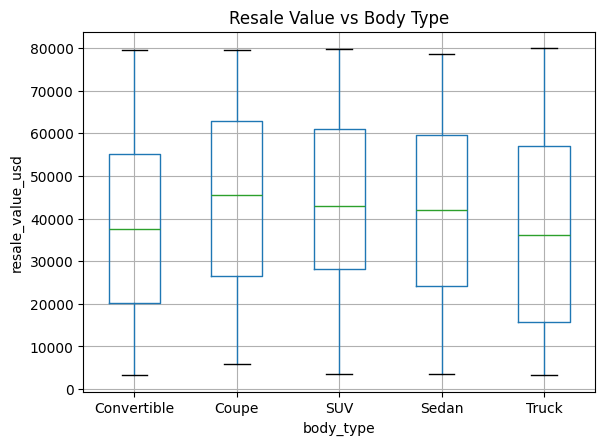

In [179]:
plt.figure()
df.boxplot(column="resale_value_usd", by="body_type")
plt.title("Resale Value vs Body Type")
plt.suptitle("")
plt.xlabel("body_type")
plt.ylabel("resale_value_usd")
plt.show()



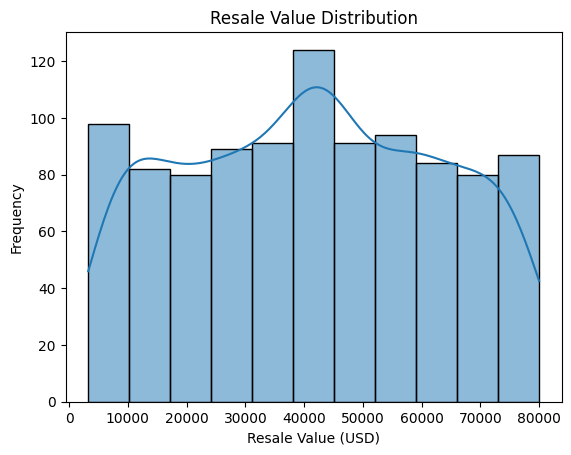

In [180]:
sns.histplot(df["resale_value_usd"], kde=True)
plt.title("Resale Value Distribution")
plt.xlabel("Resale Value (USD)")
plt.ylabel("Frequency")
plt.show()


#Regression

In [181]:
df = pd.read_csv(datalink)

In [182]:
df.columns

Index(['vehicle_age_years', 'mileage_km', 'brand_tier', 'accident_count',
       'service_history', 'ownership_count', 'vehicle_color',
       'feature_package', 'market_demand', 'fuel_type', 'transmission',
       'body_type', 'resale_value_usd'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age_years  964 non-null    float64
 1   mileage_km         946 non-null    float64
 2   brand_tier         951 non-null    object 
 3   accident_count     951 non-null    float64
 4   service_history    770 non-null    object 
 5   ownership_count    957 non-null    float64
 6   vehicle_color      946 non-null    object 
 7   feature_package    938 non-null    object 
 8   market_demand      947 non-null    object 
 9   fuel_type          950 non-null    object 
 10  transmission       960 non-null    object 
 11  body_type          947 non-null    object 
 12  resale_value_usd   959 non-null    float64
dtypes: float64(5), object(8)
memory usage: 101.7+ KB


In [184]:
df.head()

,vehicle_age_years,mileage_km,brand_tier,accident_count,service_history,ownership_count,vehicle_color,feature_package,market_demand,fuel_type,transmission,body_type,resale_value_usd
0,13.0,238276.066298,Budget,1.0,Complete,3.0,Other,Base,Medium,Petrol,Manual,Truck,77840.075894
1,4.0,112096.618741,Mainstream,1.0,Complete,4.0,Other,Premium,NaN,Diesel,Manual,Sedan,69543.393802
2,18.0,140140.179916,Luxury,0.0,NaN,1.0,White,Luxury,High,Electric,Manual,Convertible,NaN
3,16.0,188415.153719,Premium,2.0,Complete,2.0,Black,Mid,Low,Electric,Manual,Truck,35455.213825
4,10.0,182645.775262,Luxury,0.0,NaN,3.0,Other,Mid,Low,Petrol,Manual,Truck,35287.693922


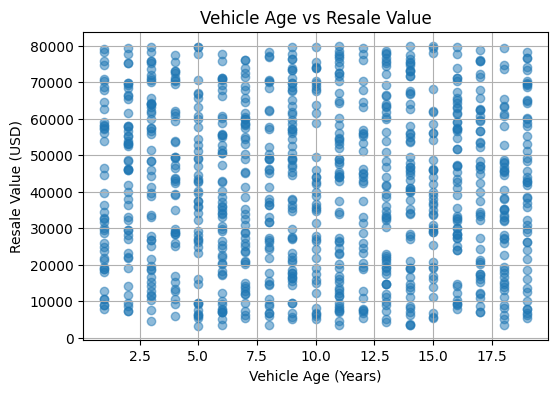

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["vehicle_age_years"], df["resale_value_usd"], alpha=0.5)
plt.title("Vehicle Age vs Resale Value")
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Resale Value (USD)")
plt.grid(True)
plt.show()



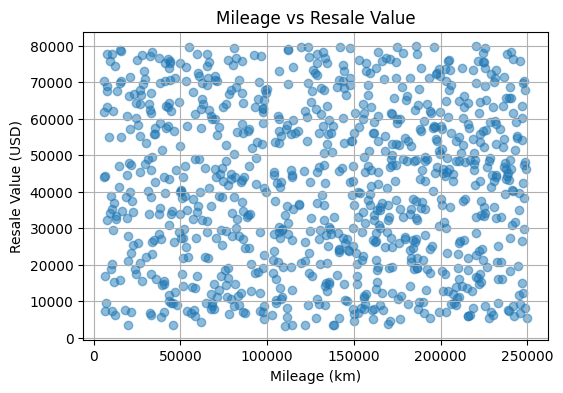

In [186]:
plt.figure(figsize=(6,4))
plt.scatter(df["mileage_km"], df["resale_value_usd"], alpha=0.5)
plt.title("Mileage vs Resale Value")
plt.xlabel("Mileage (km)")
plt.ylabel("Resale Value (USD)")
plt.grid(True)
plt.show()



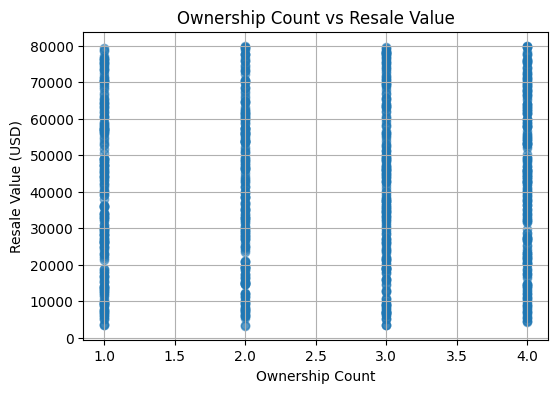

In [187]:
plt.figure(figsize=(6,4))
plt.scatter(df["ownership_count"], df["resale_value_usd"], alpha=0.5)
plt.title("Ownership Count vs Resale Value")
plt.xlabel("Ownership Count")
plt.ylabel("Resale Value (USD)")
plt.grid(True)
plt.show()




In [188]:
import statsmodels.api as sm


In [189]:
X = df['vehicle_age_years']   # predictor
Y = df['resale_value_usd']    # target


In [190]:
X = sm.add_constant(X.dropna()) # Drop NaN values from X or handle them appropriately
Y = Y.dropna() # Drop NaN values from Y or handle them appropriately

# Ensure X and Y align after dropping NaNs
aligned_index = X.index.intersection(Y.index)
X = X.loc[aligned_index]
Y = Y.loc[aligned_index]

model = sm.OLS(Y, X).fit()

In [191]:
summary = model.summary()
print(summary)             # see results



                            OLS Regression Results                            
Dep. Variable:       resale_value_usd   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5505
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.458
Time:                        03:39:01   Log-Likelihood:                -10547.
No. Observations:                 923   AIC:                         2.110e+04
Df Residuals:                     921   BIC:                         2.111e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.214e+04   1543.34

In [192]:
df2=pd.get_dummies(df)

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vehicle_age_years         964 non-null    float64
 1   mileage_km                946 non-null    float64
 2   accident_count            951 non-null    float64
 3   ownership_count           957 non-null    float64
 4   resale_value_usd          959 non-null    float64
 5   brand_tier_Budget         1000 non-null   bool   
 6   brand_tier_Luxury         1000 non-null   bool   
 7   brand_tier_Mainstream     1000 non-null   bool   
 8   brand_tier_Premium        1000 non-null   bool   
 9   service_history_Complete  1000 non-null   bool   
 10  service_history_Partial   1000 non-null   bool   
 11  vehicle_color_Black       1000 non-null   bool   
 12  vehicle_color_Blue        1000 non-null   bool   
 13  vehicle_color_Other       1000 non-null   bool   
 14  vehicle_c

In [194]:
for Feature in df2.columns:
  df2[Feature]=df2[Feature].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vehicle_age_years         964 non-null    float64
 1   mileage_km                946 non-null    float64
 2   accident_count            951 non-null    float64
 3   ownership_count           957 non-null    float64
 4   resale_value_usd          959 non-null    float64
 5   brand_tier_Budget         1000 non-null   float64
 6   brand_tier_Luxury         1000 non-null   float64
 7   brand_tier_Mainstream     1000 non-null   float64
 8   brand_tier_Premium        1000 non-null   float64
 9   service_history_Complete  1000 non-null   float64
 10  service_history_Partial   1000 non-null   float64
 11  vehicle_color_Black       1000 non-null   float64
 12  vehicle_color_Blue        1000 non-null   float64
 13  vehicle_color_Other       1000 non-null   float64
 14  vehicle_c

In [195]:
import statsmodels.api as sm

# Define predictors and target
X = df[['vehicle_age_years', 'mileage_km', 'accident_count', 'ownership_count']]
y = df['resale_value_usd']

# Combine X and y to drop NaNs consistently
df_combined = pd.concat([X, y], axis=1).dropna()
X = df_combined[['vehicle_age_years', 'mileage_km', 'accident_count', 'ownership_count']]
y = df_combined['resale_value_usd']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS model with robust standard errors (HC1)
model_robust = sm.OLS(y, X).fit(cov_type='HC1')

print("OLS Regression Results with Robust Standard Errors (HC1):")
print(model_robust.summary())

OLS Regression Results with Robust Standard Errors (HC1):
                            OLS Regression Results                            
Dep. Variable:       resale_value_usd   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8483
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.495
Time:                        03:39:01   Log-Likelihood:                -9081.3
No. Observations:                 795   AIC:                         1.817e+04
Df Residuals:                     790   BIC:                         1.820e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

#classification & Regression

In [196]:
# Recreate the X used for fitting the model_robust (OLS model)
X_for_ols_prediction = df[['vehicle_age_years', 'mileage_km', 'accident_count', 'ownership_count']]
X_for_ols_prediction = sm.add_constant(X_for_ols_prediction)

y_pred = model_robust.predict(X_for_ols_prediction)

In [197]:
rmse = np.sqrt(np.mean((y_pred - df['resale_value_usd'])**2))
print("RMSE:", rmse)
print("R-squared:", model_robust.rsquared*100)

RMSE: 22117.30039146799
R-squared: 0.41400753947313795


Step 1: Load Data

In [198]:
import pandas as pd
import numpy as np

df = pd.read_csv(datalink)

# Create categories: Low, Medium, High resale value
df['Resale_Class'] = pd.cut(df['resale_value_usd'],
                            bins=[0, 5000, 15000, np.inf],
                            labels=['Low', 'Medium', 'High'])

Step 2: Create Categories (Target for Classification)

In [199]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/vehicle_resale_value.csv')

# Quick look
print(df.head())
print(df.info())


   vehicle_age_years     mileage_km  brand_tier  accident_count  \
0               13.0  238276.066298      Budget             1.0   
1                4.0  112096.618741  Mainstream             1.0   
2               18.0  140140.179916      Luxury             0.0   
3               16.0  188415.153719     Premium             2.0   
4               10.0  182645.775262      Luxury             0.0   

  service_history  ownership_count vehicle_color feature_package  \
0        Complete              3.0         Other            Base   
1        Complete              4.0         Other         Premium   
2             NaN              1.0         White          Luxury   
3        Complete              2.0         Black             Mid   
4             NaN              3.0         Other             Mid   

  market_demand fuel_type transmission    body_type  resale_value_usd  
0        Medium    Petrol       Manual        Truck      77840.075894  
1           NaN    Diesel       Manual      

Converting continuous resale value into classes: Low, Medium, High

In [200]:
import numpy as np

# Define bins for resale value
df['Resale_Class'] = pd.cut(df['resale_value_usd'],
                            bins=[0, 5000, 15000, np.inf],
                            labels=['Low', 'Medium', 'High'])

# Check distribution
print(df['Resale_Class'].value_counts())

Resale_Class
High      804
Medium    144
Low        11
Name: count, dtype: int64


Step 3: Preprocess Features

In [201]:
X = df.drop(['resale_value_usd', 'Resale_Class'], axis=1)
y = df['Resale_Class']

In [202]:
X = pd.get_dummies(X, drop_first=True)


Step 4: Split Data

In [203]:
from sklearn.model_selection import train_test_split

# Combine X and y to drop NaNs consistently before splitting
df_cleaned = pd.concat([X, y], axis=1).dropna()
X_cleaned = df_cleaned.drop(columns=['Resale_Class'])
y_cleaned = df_cleaned['Resale_Class']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

Step 5: Train a Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [205]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8364779874213837

Confusion Matrix:
 [[133   0   0]
 [  2   0   0]
 [ 24   0   0]]

Classification Report:
               precision    recall  f1-score   support

        High       0.84      1.00      0.91       133
         Low       0.00      0.00      0.00         2
      Medium       0.00      0.00      0.00        24

    accuracy                           0.84       159
   macro avg       0.28      0.33      0.30       159
weighted avg       0.70      0.84      0.76       159



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#classification using neural network

In [206]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------
# Features and target
# -----------------------
X = df.drop(columns=["Resale_Class", "resale_value_usd"])
y = df["Resale_Class"]

# Combine X and y to drop NaNs consistently before splitting
df_combined_nn = pd.concat([X, y], axis=1)
df_combined_nn_cleaned = df_combined_nn.dropna()

X_nn_cleaned = df_combined_nn_cleaned.drop(columns=['Resale_Class'])
y_nn_cleaned = df_combined_nn_cleaned['Resale_Class']

# -----------------------
# Separate column types
# -----------------------
cat_cols = X_nn_cleaned.select_dtypes(include="object").columns # Use cleaned X
num_cols = X_nn_cleaned.select_dtypes(exclude="object").columns # Use cleaned X

# -----------------------
# Preprocessing
# -----------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# -----------------------
# Neural Network model
# -----------------------
nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

# -----------------------
# Pipeline
# -----------------------
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", nn_model)
])

# -----------------------
# Train–test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_nn_cleaned, y_nn_cleaned,
    test_size=0.2,
    random_state=42,
    stratify=y_nn_cleaned # Stratify on cleaned target
)

# -----------------------
# Train
# -----------------------
model.fit(X_train, y_train)

# -----------------------
# Predict
# -----------------------
y_pred = model.predict(X_test)

# -----------------------
# Evaluation
# -----------------------
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.788235294117647

Classification Report:

              precision    recall  f1-score   support

        High       0.86      0.92      0.88        71
         Low       0.00      0.00      0.00         1
      Medium       0.22      0.15      0.18        13

    accuracy                           0.79        85
   macro avg       0.36      0.36      0.36        85
weighted avg       0.75      0.79      0.77        85



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Trained Model Interface

STEP-1 : Load the dataset

In [207]:
import pandas as pd

df = pd.read_excel("/content/InteractiveSheet_2026-02-11_09_27_44.xlsx")
df.head()

,vehicle_age_years,mileage_km,brand_tier,accident_count,service_history,ownership_count,vehicle_color,feature_package,market_demand,fuel_type,transmission,body_type,resale_value_usd,Resale_Class
0,13.0,238276.066298,Budget,1.0,Complete,3.0,Other,Base,Medium,Petrol,Manual,Truck,77840.075894,High
1,4.0,112096.618741,Mainstream,1.0,Complete,4.0,Other,Premium,Medium,Diesel,Manual,Sedan,69543.393802,High
2,18.0,140140.179916,Luxury,0.0,Complete,1.0,White,Luxury,High,Electric,Manual,Convertible,41310.175055,High
3,16.0,188415.153719,Premium,2.0,Complete,2.0,Black,Mid,Low,Electric,Manual,Truck,35455.213825,High
4,10.0,182645.775262,Luxury,0.0,Complete,3.0,Other,Mid,Low,Petrol,Manual,Truck,35287.693922,High


STEP-2 : Check null values

In [208]:
df.isnull().sum()

,0
vehicle_age_years,0
mileage_km,0
brand_tier,0
accident_count,0
service_history,0
ownership_count,0
vehicle_color,0
feature_package,0
market_demand,0
fuel_type,0


STEP-3 : Separate input and output

In [222]:
X = df.drop(columns=["resale_value_usd", "Resale_Class"])
y = df["resale_value_usd"]

STEP –4 : Encode categorical columns

In [210]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    "brand_tier",
    "service_history",
    "vehicle_color",
    "feature_package",
    "market_demand",
    "fuel_type",
    "transmission",
    "body_type"
]

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

STEP-5 : Train-test split

In [211]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


STEP-6 :train the model

In [212]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

STEP-7 : Evaluate the model

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2  :", r2_score(y_test, pred))

MAE : 18589.910950874986
RMSE: 21929.412169585517
R2  : -0.052679514970983554


STEP-7 : Evaluate the model

#USER  Interface

In [214]:
X.columns


Index(['vehicle_age_years', 'mileage_km', 'brand_tier', 'accident_count',
       'service_history', 'ownership_count', 'vehicle_color',
       'feature_package', 'market_demand', 'fuel_type', 'transmission',
       'body_type'],
      dtype='object')

STEP-9 : Install Gradio (UI library)

In [215]:
!pip install gradio


STEP-10 : Create prediction function for UI

In [216]:
import pandas as pd

def predict_resale_value(
    vehicle_age_years,
    mileage_km,
    brand_tier,
    accident_count,
    service_history,
    ownership_count,
    vehicle_color,
    feature_package,
    market_demand,
    fuel_type,
    transmission,
    body_type
):

    input_df = pd.DataFrame([{
        "vehicle_age_years": float(vehicle_age_years),
        "mileage_km": float(mileage_km),
        "brand_tier": float(brand_tier),
        "accident_count": float(accident_count),
        "service_history": float(service_history),
        "ownership_count": float(ownership_count),
        "vehicle_color": float(vehicle_color),
        "feature_package": float(feature_package),
        "market_demand": float(market_demand),
        "fuel_type": float(fuel_type),
        "transmission": float(transmission),
        "body_type": float(body_type)
    }])

    result = model.predict(input_df)

    return round(float(result[0]), 2)



STEP-11 : Create the UI

In [217]:
import gradio as gr
import pandas as pd
import numpy as np
import hashlib

# ------------------------------
# Secure user database
# ------------------------------
def hash_pw(p):
    return hashlib.sha256(p.encode()).hexdigest()

USERS = {
    "admin": {"password": hash_pw("admin123"), "role": "admin"},
    "user": {"password": hash_pw("user123"), "role": "user"}
}

# ------------------------------
# Dummy ML model (replace with your trained model later)
# ------------------------------
def predict_resale_value(
        vehicle_age_years, mileage_km, brand_tier, accident_count,
        service_history, ownership_count, vehicle_color, feature_package,
        market_demand, fuel_type, transmission, body_type):

    features = np.array([
        vehicle_age_years, mileage_km, brand_tier, accident_count,
        service_history, ownership_count, vehicle_color, feature_package,
        market_demand, fuel_type, transmission, body_type
    ], dtype=float)

    base_price = 30000
    depreciation = (
        vehicle_age_years * 1200 +
        mileage_km * 0.05 +
        accident_count * 2000 +
        ownership_count * 1500
    )

    bonus = (
        brand_tier * 1000 +
        feature_package * 800 +
        market_demand * 1200
    )

    price = base_price - depreciation + bonus

    price = max(price, 1000)

    low = price * 0.9
    high = price * 1.1

    return round(price, 2)


# ------------------------------
# Batch prediction
# ------------------------------
def batch_predict(file):
    df = pd.read_csv(file.name)

    preds = []
    for _, r in df.iterrows():
        p, _ = predict_resale_value(
            r["vehicle_age_years"], r["mileage_km"], r["brand_tier"],
            r["accident_count"], r["service_history"], r["ownership_count"],
            r["vehicle_color"], r["feature_package"], r["market_demand"],
            r["fuel_type"], r["transmission"], r["body_type"]
        )
        preds.append(p)

    df["Predicted_Resale_Value"] = preds
    return df


# ------------------------------
# Login logic
# ------------------------------
def login(username, password):
    if username in USERS and USERS[username]["password"] == hash_pw(password):
        role = USERS[username]["role"]
        return gr.update(visible=False), gr.update(visible=True), f"Logged in as {role}", role
    else:
        return gr.update(visible=True), gr.update(visible=False), "Invalid username or password", ""


def logout():
    return gr.update(visible=True), gr.update(visible=False), "", ""


# ------------------------------
# UI
# ------------------------------
with gr.Blocks() as app:

    gr.Markdown("## 🔐 Vehicle Resale Value Prediction – Secure Login")

    user_role = gr.State("")

    # ---------------- Login page ----------------
    with gr.Column(visible=True) as login_page:
        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")
        login_btn = gr.Button("Login")
        login_msg = gr.Markdown("")

    # ---------------- Main app ----------------
    with gr.Column(visible=False) as main_app:

        status = gr.Markdown()

        logout_btn = gr.Button("Logout")

        with gr.Tabs():

            # ---------- Single prediction tab ----------
            with gr.Tab("Single Prediction"):

                gr.Markdown("### 🚗 Enter Vehicle Details")

                vehicle_age_years = gr.Slider(0, 20, step=1, label="Vehicle Age (years)")
                mileage_km = gr.Number(label="Mileage (km)", value=50000)

                brand_tier = gr.Dropdown([0,1,2], label="Brand Tier (0=Low,1=Mid,2=High)")
                accident_count = gr.Slider(0, 5, step=1, label="Accident Count")

                service_history = gr.Dropdown([0,1], label="Service History (0=Poor,1=Good)")
                ownership_count = gr.Slider(1, 5, step=1, label="Ownership Count")

                vehicle_color = gr.Dropdown([0,1,2], label="Vehicle Color (encoded)")
                feature_package = gr.Dropdown([0,1,2], label="Feature Package")
                market_demand = gr.Dropdown([0,1,2], label="Market Demand")

                fuel_type = gr.Dropdown([0,1,2], label="Fuel Type")
                transmission = gr.Dropdown([0,1], label="Transmission")
                body_type = gr.Dropdown([0,1,2], label="Body Type")

                predict_btn = gr.Button("Predict")

                output = gr.Number(label="Predicted Resale Value (USD)")


                clear_btn = gr.Button("Clear Inputs")

                predict_btn.click(
                    fn=predict_resale_value,
                    inputs=[
                        vehicle_age_years, mileage_km, brand_tier, accident_count,
                        service_history, ownership_count, vehicle_color,
                        feature_package, market_demand, fuel_type,
                        transmission, body_type
                    ],
                    outputs=output
                )

                clear_btn.click(
                    fn=lambda: [0,0,0,0,0,1,0,0,0,0,0,0],
                    outputs=[
                        vehicle_age_years, mileage_km, brand_tier, accident_count,
                        service_history, ownership_count, vehicle_color,
                        feature_package, market_demand, fuel_type,
                        transmission, body_type
                    ]
                )

            # ---------- Batch prediction tab ----------
            with gr.Tab("Batch Prediction (CSV)"):

                gr.Markdown("""
Upload a CSV file with columns:

vehicle_age_years, mileage_km, brand_tier, accident_count,
service_history, ownership_count, vehicle_color,
feature_package, market_demand, fuel_type, transmission, body_type
""")

                file_upload = gr.File(label="Upload CSV file")
                batch_btn = gr.Button("Run Batch Prediction")

                batch_output = gr.Dataframe()

                batch_btn.click(batch_predict, inputs=file_upload, outputs=batch_output)


    # ---------------- Events ----------------
    login_btn.click(
        fn=login,
        inputs=[username, password],
        outputs=[login_page, main_app, login_msg, user_role]
    )

    logout_btn.click(
        fn=logout,
        outputs=[login_page, main_app, login_msg, user_role]
    )

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://824f7abb4743b0b4c2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
